In [1]:
!pip install opencv-python

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
plt.style.use('dark_background')

# Read Input Image

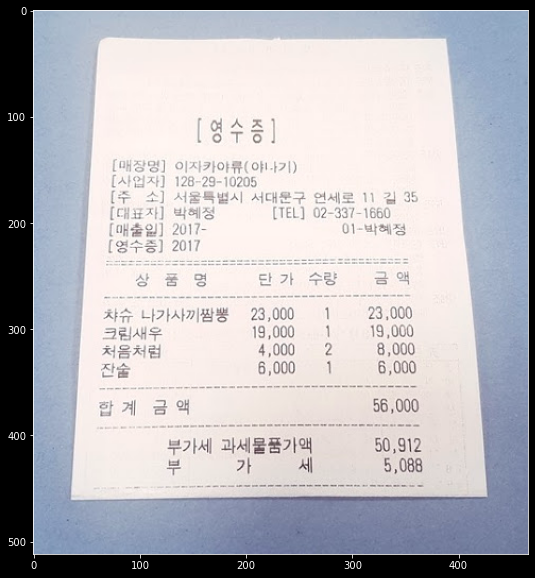

In [19]:
img_ori = cv2.imread('C:/Users/User/Desktop/receipt_drink.jpg')
#img_ori = cv2.imread('1.jpg')
height, width, channel = img_ori.shape

plt.figure(figsize=(12, 10))
plt.imshow(img_ori, cmap='gray')

# Convert Image to Grayscale

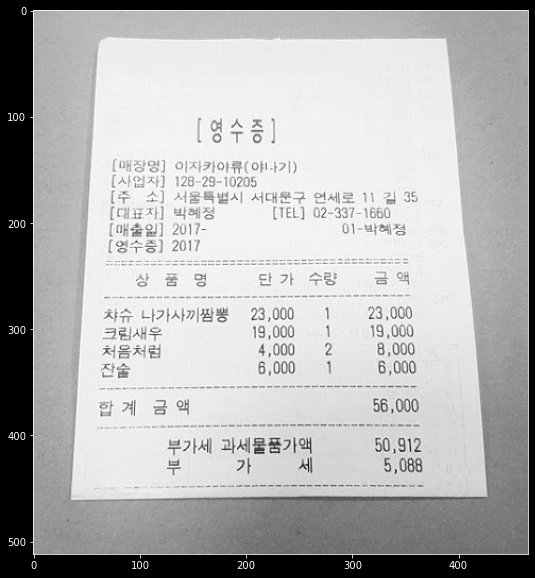

In [20]:
# hsv = cv2.cvtColor(img_ori, cv2.COLOR_BGR2HSV)
# gray = hsv[:,:,2]
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')

# Maximize Contrast (Optional)

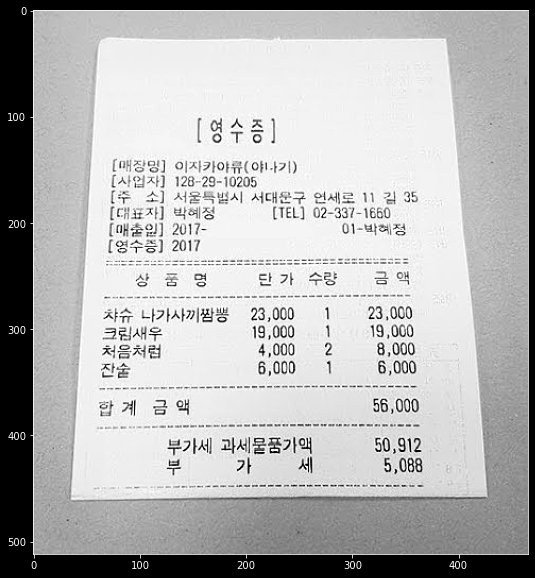

In [21]:
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')

# Adaptive Thresholding

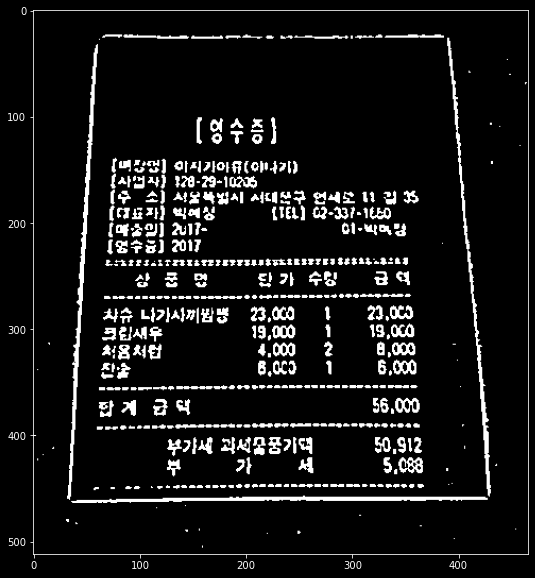

In [22]:
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')

## Morphological Transformation 적용

In [44]:
#str = pytesseract.image_to_string(img_thresh, lang='kor', config='--psm 1 -c preserve_interword_spaces=1')
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,5))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8,3))
close = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE,  kernel)
cv2.imshow('test', close)
cv2.waitKey()

-1

# Find Contours

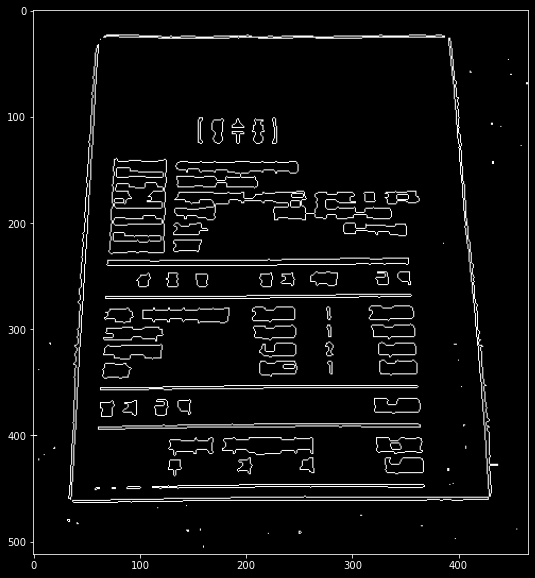

In [24]:
contours, _ = cv2.findContours(
    close, 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))

plt.figure(figsize=(12, 10))
plt.imshow(temp_result)

# Prepare Data

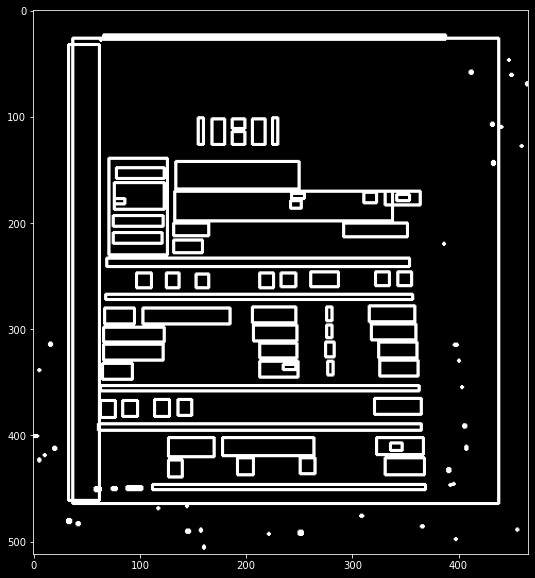

In [25]:
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
    
    # insert to dict
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

# Select Candidates by Char Size

In [26]:
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

X좌표: 127 Y좌표: 423 W좌표: 13 H좌표: 16 1
X좌표: 331 Y좌표: 421 W좌표: 37 H좌표: 16 2
X좌표: 251 Y좌표: 421 W좌표: 14 H좌표: 15 3
X좌표: 192 Y좌표: 421 W좌표: 15 H좌표: 16 4
X좌표: 323 Y좌표: 402 W좌표: 44 H좌표: 16 5
X좌표: 178 Y좌표: 402 W좌표: 86 H좌표: 17 6
X좌표: 127 Y좌표: 402 W좌표: 43 H좌표: 18 7
X좌표: 84 Y좌표: 367 W좌표: 14 H좌표: 15 8
X좌표: 63 Y좌표: 367 W좌표: 14 H좌표: 16 9
X좌표: 136 Y좌표: 366 W좌표: 13 H좌표: 15 10
X좌표: 114 Y좌표: 366 W좌표: 14 H좌표: 16 11
X좌표: 321 Y좌표: 365 W좌표: 44 H좌표: 15 12
X좌표: 65 Y좌표: 332 W좌표: 28 H좌표: 15 13
X좌표: 213 Y좌표: 330 W좌표: 36 H좌표: 15 14
X좌표: 326 Y좌표: 329 W좌표: 36 H좌표: 15 15
X좌표: 66 Y좌표: 314 W좌표: 56 H좌표: 15 16
X좌표: 213 Y좌표: 313 W좌표: 35 H좌표: 14 17
X좌표: 325 Y좌표: 312 W좌표: 36 H좌표: 15 18
X좌표: 66 Y좌표: 298 W좌표: 57 H좌표: 14 19
X좌표: 207 Y좌표: 296 W좌표: 41 H좌표: 15 20
X좌표: 318 Y좌표: 295 W좌표: 42 H좌표: 15 21
X좌표: 103 Y좌표: 280 W좌표: 82 H좌표: 15 22
X좌표: 67 Y좌표: 280 W좌표: 28 H좌표: 15 23
X좌표: 206 Y좌표: 279 W좌표: 41 H좌표: 15 24
X좌표: 316 Y좌표: 278 W좌표: 43 H좌표: 15 25
X좌표: 153 Y좌표: 248 W좌표: 12 H좌표: 13 26
X좌표: 233 Y좌표: 247 W좌표: 14 H좌표: 13 27
X좌표: 213 Y좌표: 24

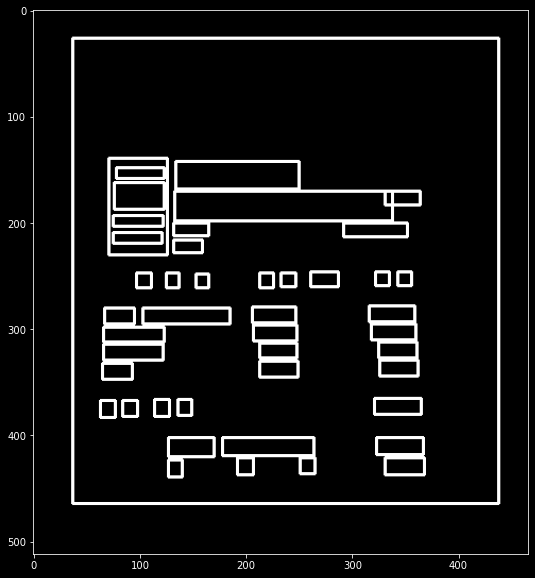

In [27]:
MIN_AREA = 150
MIN_WIDTH, MIN_HEIGHT = 8, 2
#MIN_RATIO, MAX_RATIO = 0.1, 8.0
MIN_RATIO, MAX_RATIO = 0.5, 8.0
possible_contours = []

cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']
    
    if area > MIN_AREA \
    and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)
        
# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)
nata =0
for d in possible_contours:
#     cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)
    nata = nata + 1
    print('X좌표:',d['x'] ,'Y좌표:' ,d['y'], 'W좌표:', d['w'], 'H좌표:', d['h'], nata)

    
plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

### 절댓값으로 Contour 주기

In [29]:
cv2.rectangle(gray, pt1=(97, 247), pt2=(153+12, 248+13), color=(0, 255, 255), thickness=2)


cv2.rectangle(gray, pt1=(67, 280), pt2=(103+82, 280+15), color=(0, 255, 255), thickness=2)
cv2.rectangle(gray, pt1=(66, 298), pt2=(66+57, 298+14), color=(0, 255, 255), thickness=2)
cv2.rectangle(gray, pt1=(66, 314), pt2=(66+56, 314+15), color=(0, 255, 255), thickness=2)
cv2.rectangle(gray, pt1=(65, 332), pt2=(65+28, 332+15), color=(0, 255, 255), thickness=2)
# cv2.rectangle(temp_result, pt1=(67, 280), pt2=(103+82, 280+15), color=(255, 255, 255), thickness=2)
# cv2.rectangle(temp_result, pt1=(66, 314), pt2=(325+36, 312+15), color=(255, 255, 255), thickness=2)
# cv2.rectangle(temp_result, pt1=(65, 332), pt2=(326+36, 329+15), color=(255, 255, 255), thickness=2)
# cv2.rectangle(temp_result, pt1=(63, 367), pt2=(322+44, 365+15), color=(255, 255, 255), thickness=2)
# cv2.rectangle(temp_result, pt1=(127, 402), pt2=(323+44, 402+16), color=(255, 255, 255), thickness=2)
# cv2.rectangle(temp_result, pt1=(127, 423), pt2=(331+37, 421+16), color=(255, 255, 255), thickness=2)




#X좌표: 66 Y좌표: 298 W(너비): 57 H(높이): 14   19번째
# X좌표: 97 Y좌표: 247 W(너비): 14 H(높이): 14   30번째
# X좌표: 153 Y좌표: 248 W(너비): 12 H(높이): 13   26번째
#X좌표: 343 Y좌표: 246 W(너비): 13 H(높이): 13   31번째
# X좌표: 67 Y좌표: 280 W(너비): 28 H(높이): 15   23번째
# X좌표: 103 Y좌표: 280 W(너비): 82 H(높이): 15   22번째
#X좌표: 316 Y좌표: 278 W(너비): 43 H(높이): 15   25번째
#X좌표: 66 Y좌표: 298 W(너비): 57 H(높이): 14   19번째
#X좌표: 318 Y좌표: 295 W(너비): 42 H(높이): 15   21번째
#X좌표: 66 Y좌표: 314 W(너비): 56 H(높이): 15   16번째
#X좌표: 325 Y좌표: 312 W(너비): 36 H(높이): 15   18번째
#X좌표: 65 Y좌표: 332 W(너비): 28 H(높이): 15   13번째
#                X좌표: 326 Y좌표: 329 W(너비): 36 H(높이): 15   15번째
# X좌표: 63 Y좌표: 367 W(너비): 14 H(높이): 16   9번째
#                 X좌표: 321 Y좌표: 365 W(너비): 44 H(높이): 15   12번째
#X좌표: 127 Y좌표: 402 W(너비): 43 H(높이): 18   7번째
#X좌표: 323 Y좌표: 402 W(너비): 44 H(높이): 16   5번째
# X좌표: 127 Y좌표: 423 W(너비): 13 H(높이): 16   1번째
#                 X좌표: 331 Y좌표: 421 W(너비): 37 H(높이): 16   2번째
cv2.imshow('test', gray)
cv2.waitKey()

-1

## 딕셔너리를 리스트로 바꿔줌

In [28]:
a = []
for i in possible_contours:
    line = []
    line.append(i['x'])
    line.append(i['y'])
    line.append(i['w'])
    line.append(i['h'])
    print(line)
    a.append(line)
        

[127, 423, 13, 16]
[331, 421, 37, 16]
[251, 421, 14, 15]
[192, 421, 15, 16]
[323, 402, 44, 16]
[178, 402, 86, 17]
[127, 402, 43, 18]
[84, 367, 14, 15]
[63, 367, 14, 16]
[136, 366, 13, 15]
[114, 366, 14, 16]
[321, 365, 44, 15]
[65, 332, 28, 15]
[213, 330, 36, 15]
[326, 329, 36, 15]
[66, 314, 56, 15]
[213, 313, 35, 14]
[325, 312, 36, 15]
[66, 298, 57, 14]
[207, 296, 41, 15]
[318, 295, 42, 15]
[103, 280, 82, 15]
[67, 280, 28, 15]
[206, 279, 41, 15]
[316, 278, 43, 15]
[153, 248, 12, 13]
[233, 247, 14, 13]
[213, 247, 13, 14]
[125, 247, 12, 14]
[97, 247, 14, 14]
[343, 246, 13, 13]
[322, 246, 13, 13]
[261, 246, 26, 14]
[132, 216, 27, 12]
[75, 209, 46, 10]
[292, 200, 60, 13]
[132, 200, 33, 12]
[75, 193, 47, 10]
[331, 170, 33, 13]
[133, 170, 205, 28]
[76, 162, 47, 25]
[78, 148, 45, 10]
[134, 142, 116, 26]
[71, 139, 55, 91]
[37, 26, 401, 438]


In [30]:
img_lst = []
cont =1
img = cv2.imread('C:/Users/User/Desktop/receipt_drink.jpg')
for d in possible_contours:
    cropped_image = img[d['y']: d['y'] + d['h'], d['x']: d['x'] + d['w']]
    img_lst.append(cropped_image)
    print('X좌표:',d['x'] ,'Y좌표:' ,d['y'], 'W(너비):', d['w'], 'H(높이):', d['h'], '  '+ str(cont) + '번째')
#     tst = pytesseract.image_to_string(cropped_image, lang='kor', config='--psm 7 --oem 0')
#     print(tst)
    cv2.imwrite('C:/Users/User/Desktop/tes_ocr3/img'+str(cont)+'.png', cropped_image)
    cont = cont+ 1
#     cv2.imshow('test',cropped_image)
#     cv2.waitKey()

    
    



X좌표: 127 Y좌표: 423 W(너비): 13 H(높이): 16   1번째
X좌표: 331 Y좌표: 421 W(너비): 37 H(높이): 16   2번째
X좌표: 251 Y좌표: 421 W(너비): 14 H(높이): 15   3번째
X좌표: 192 Y좌표: 421 W(너비): 15 H(높이): 16   4번째
X좌표: 323 Y좌표: 402 W(너비): 44 H(높이): 16   5번째
X좌표: 178 Y좌표: 402 W(너비): 86 H(높이): 17   6번째
X좌표: 127 Y좌표: 402 W(너비): 43 H(높이): 18   7번째
X좌표: 84 Y좌표: 367 W(너비): 14 H(높이): 15   8번째
X좌표: 63 Y좌표: 367 W(너비): 14 H(높이): 16   9번째
X좌표: 136 Y좌표: 366 W(너비): 13 H(높이): 15   10번째
X좌표: 114 Y좌표: 366 W(너비): 14 H(높이): 16   11번째
X좌표: 321 Y좌표: 365 W(너비): 44 H(높이): 15   12번째
X좌표: 65 Y좌표: 332 W(너비): 28 H(높이): 15   13번째
X좌표: 213 Y좌표: 330 W(너비): 36 H(높이): 15   14번째
X좌표: 326 Y좌표: 329 W(너비): 36 H(높이): 15   15번째
X좌표: 66 Y좌표: 314 W(너비): 56 H(높이): 15   16번째
X좌표: 213 Y좌표: 313 W(너비): 35 H(높이): 14   17번째
X좌표: 325 Y좌표: 312 W(너비): 36 H(높이): 15   18번째
X좌표: 66 Y좌표: 298 W(너비): 57 H(높이): 14   19번째
X좌표: 207 Y좌표: 296 W(너비): 41 H(높이): 15   20번째
X좌표: 318 Y좌표: 295 W(너비): 42 H(높이): 15   21번째
X좌표: 103 Y좌표: 280 W(너비): 82 H(높이): 15   22번째
X좌표: 67 Y좌표: 280 W(너비): 

In [43]:
img = cv2.imread('C:/Users/User/Desktop/receipt_drink.jpg')

cropped_image2 = img[280: 280 + 15, 67: 103 + 82]

cream3 = img_ori[298: 298 + 14, 66: 66 + 57]

sul3 = img_ori[314: 314 + 15, 66: 66 + 56]

jansul = gray[332: 332 + 15, 65: 65 + 28]




tst = pytesseract.image_to_string(cropped_image2, lang='kor', config='--psm 7 --oem 0')

test22 =  pytesseract.image_to_string(cream3, lang='kor', config='--psm 7 --oem 0')

test44 = pytesseract.image_to_string(sul3, lang='kor', config='--psm 7 --oem 0')

test5 = pytesseract.image_to_string(jansul, lang='kor', config='--psm 7 --oem 0')



print(tst)

print(test22)

print(test44)

print(test5)

자슈 니캬시꺼빕쁠

크람새우

처음처럼

진술



# Select Candidates by Arrangement of Contours

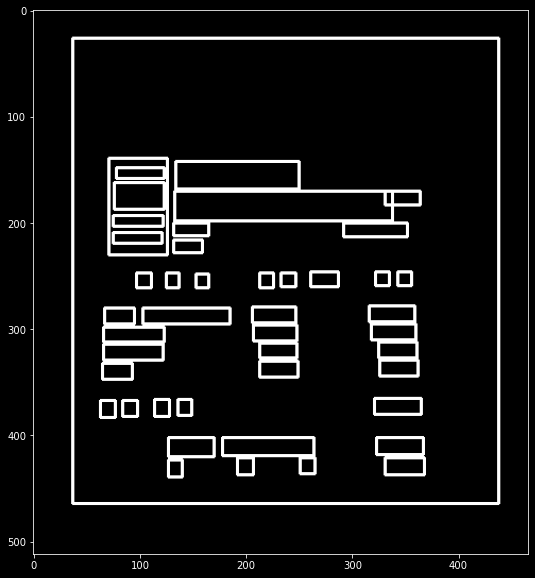

In [45]:
MAX_DIAG_MULTIPLYER = 5 # 5 Contour 간의 길이 측정 * 지금 쓸모없음
MAX_ANGLE_DIFF = 12.0 # 12.0 Contour 간의 각도
MAX_AREA_DIFF = 0.5 # 0.5 Contour 간의 넓이 차이
MAX_WIDTH_DIFF = 0.8 # Contour 간의 너비 차이
MAX_HEIGHT_DIFF = 0.2 # Contour 간의 높이 차이
MIN_N_MATCHED = 0 # 3  # Contour 가 최소 3개 이상 연속되어야 인정

def find_chars(contour_list):
    matched_result_idx = []
    
    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)

            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            if dx == 0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy / dx))
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']

            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contours_idx.append(d2['idx'])

        # append this contour
        matched_contours_idx.append(d1['idx'])

        if len(matched_contours_idx) < MIN_N_MATCHED:
            continue

        matched_result_idx.append(matched_contours_idx)

        unmatched_contour_idx = []
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])

        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)
        
        # recursive
        recursive_contour_list = find_chars(unmatched_contour)
        
        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break

    return matched_result_idx
    
result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))

# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)
for r in matched_result:
    for d in r:
#         cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
        cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')